# Finding Heavy Traffic Indicators on I-94

* I am going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).
* The goal of the analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.
* You can find the dataset for download [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')

In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


**The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).**

## Analyzing Traffic Volume
We first explore the `traffic_volume` column:

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

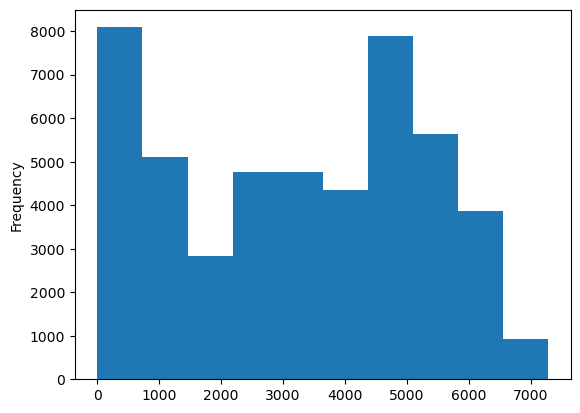

In [8]:
traffic['traffic_volume'].plot.hist()
traffic['traffic_volume'].describe()

The average number of cars in the road is 3260 and the maximum number of cars seen in the road was 7280. 

To do an initial better visualization of this data, I will divide the dataset between daytime and nighttime:
* **DAYTIME: from 7 a.m to 7 p.m**
* **NIGHTTIME: from 7 p.m to 7 a.m**

## Traffic Volume: Day vs. Night

In [11]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
day = traffic[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


On the `night`variable, I used the logic parameter `|` because it means 'or'.

Inspecting the dataset, is possible to see that some rows have missing data. Thus `day`variable have more rows then `night`variable

In [13]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [14]:
traffic['Hour'] = traffic['date_time'].dt.hour

In [15]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,Hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


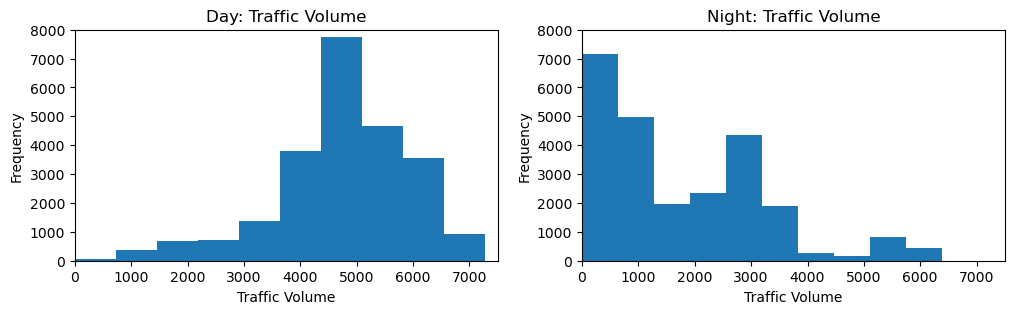

In [16]:
plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)

plt.hist(day['traffic_volume'])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Day: Traffic Volume')

plt.subplot(1, 2, 2)

plt.hist(night['traffic_volume'])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.title('Night: Traffic Volume')
plt.show()

In [17]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [18]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The plots make it clear that the traffic volume is much higher during the day. So, the analysis will continue just with the daytime data.

 ## Finding Heavy Traffic Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameterof day

- Month
- Day of the week
- Time of the day

### Monthly Parameters

C:\Users\victo\AppData\Local\Temp\ipykernel_19228\810514370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['month'] = day['date_time'].dt.month


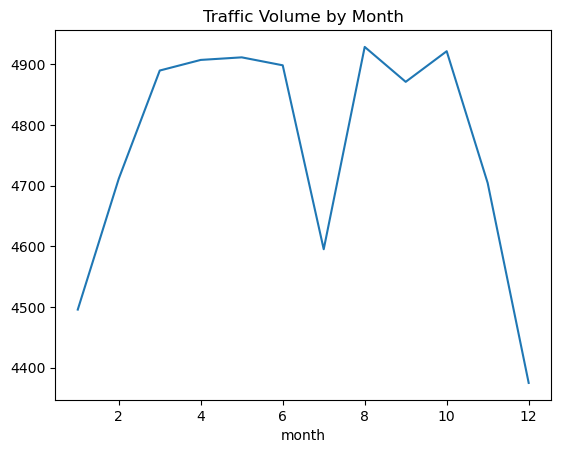

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month
month,,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727,1.0
2,266.663789,0.004019,0.000000,51.550459,4711.198394,2.0
3,273.619940,0.015839,0.000000,56.827811,4889.409560,3.0
4,279.661071,0.105343,0.000000,59.221525,4906.894305,4.0
5,289.282668,0.130863,0.000000,56.548825,4911.121609,5.0
6,294.576068,0.271121,0.000000,48.612374,4898.019566,6.0
7,296.785052,4.412258,0.000000,42.176619,4595.035744,7.0
8,295.119191,0.228113,0.000000,42.556892,4928.302035,8.0
9,292.520287,0.289807,0.000000,45.184112,4870.783145,9.0


In [23]:
import numpy as np
# Convert date_time to month
day['month'] = day['date_time'].dt.month

# Select only numeric columns for aggregation
numeric_columns = day.select_dtypes(include=[np.number])

# Group by 'month' and calculate the mean only for numeric columns
by_month = numeric_columns.groupby(day['month']).mean()

# Plot traffic volume by month
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.show()

by_month

The traffic volume is much lower between june-august and also between december-january. This happens probably because of the period of holidays in this months. 

The month of july is looking a little bit weird. I am going to investigate it further below.

#### July Inspection

C:\Users\victo\AppData\Local\Temp\ipykernel_19228\1856030892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['year'] = day['date_time'].dt.year


<Axes: title={'center': 'July Average Traffic by Year'}, xlabel='year'>

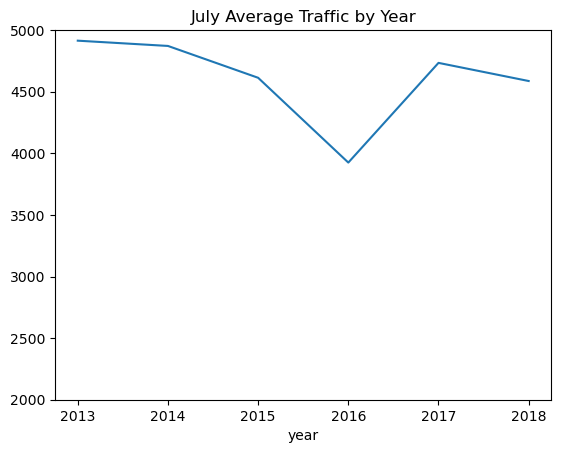

In [26]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] ==7]
july.select_dtypes(include = [np.number]).groupby('year').mean()['traffic_volume'].plot.line(title = 'July Average Traffic by Year', ylim = (2000,5000))

As it is possible to see, something happened in 2016 that pushed july average down.

### Day of the week

C:\Users\victo\AppData\Local\Temp\ipykernel_19228\1171353047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['day_of_week'] = day['date_time'].dt.dayofweek


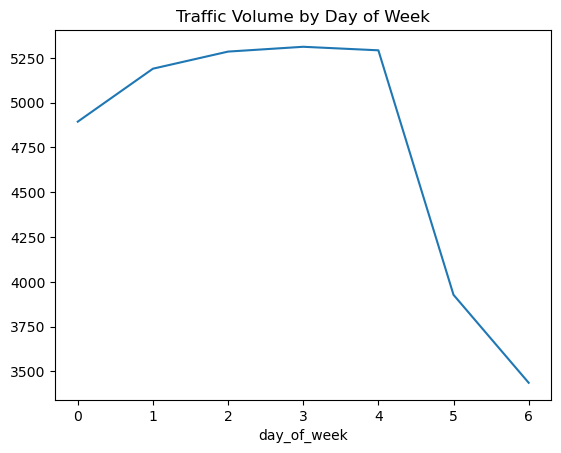

In [29]:
day['day_of_week'] = day['date_time'].dt.dayofweek

numeric_columns = day.select_dtypes(include=[np.number])

by_day_of_week = numeric_columns.groupby(day['day_of_week']).mean()

by_day_of_week['traffic_volume'].plot.line()
plt.title('Traffic Volume by Day of Week') # 0 is monday and 6 is sunday
plt.show()

The volume is much higher during business days. Fun to see that monday has a little bit less traffic than the other business days, something I already felt in my own town.

**Generating a line plot for the time of day. The weekends, however, will drag down the average values, I am going to look at the averages separately.**

In [32]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['day_of_week'] <= 4] # 4 == Friday
weekend = day.copy()[day['day_of_week'] >= 5] # 5 == Saturday

C:\Users\victo\AppData\Local\Temp\ipykernel_19228\1302516746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day['hour'] = day['date_time'].dt.hour


## Time of Day

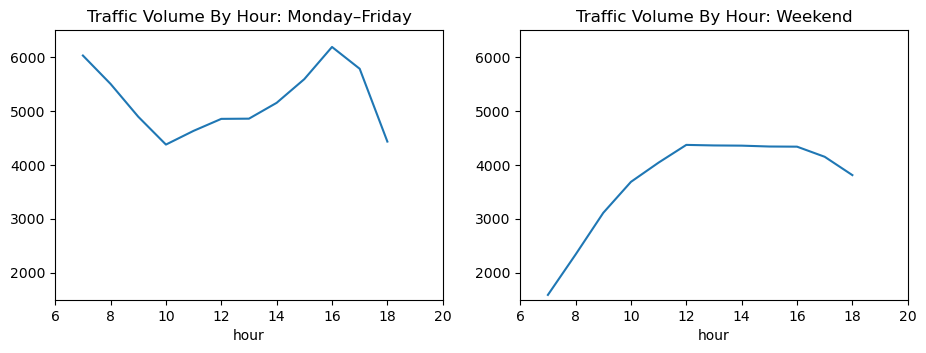

In [34]:
n_business_days = business_days.select_dtypes(include=[np.number])
n_weekend = weekend.select_dtypes(include=[np.number])

by_hour_business = n_business_days.groupby(day['hour']).mean()

by_hour_weekend = n_weekend.groupby('hour').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

As expected, during business days the volume is higher and near 6 A.M/6 P.M is the highest traffic, since it is rush hour.

During weekends, **the traffic volume is like a plateau** after the beggining of the morning.

### Time-Based Inferences

From the analysis of time-based patterns above, we can conclude that we encounter heavier traffic during:tion.

- **Warmer months (March - October)**
- **Business days (Monday - Friday)**
- **Rush hour periods (7-9am and 4-6pm)**
  
As weather can also impact traffic, we'll continue our analysis using the weather related columns from our dataset: temp, snow_1h, clouds_all, weather_main, and weather description.

## Weather Indicators

### Numeric Weather Data

In [40]:
numerical_weather = traffic[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description']].select_dtypes(include=[np.number])

In [41]:
numerical_weather.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all'], dtype='object')

In [42]:
correlation_temp = day['temp'].corr(day['traffic_volume'])
correlation_rain = day['rain_1h'].corr(day['traffic_volume'])
correlation_snow = day['snow_1h'].corr(day['traffic_volume'])
correlation_clouds = day['clouds_all'].corr(day['traffic_volume'])
print(correlation_temp, correlation_rain, correlation_snow, correlation_clouds)

0.1283165685230392 0.0036965098350734324 0.0012653498471759833 -0.032932348661639486


The only weather variable with a relevant correlation is `temp`.

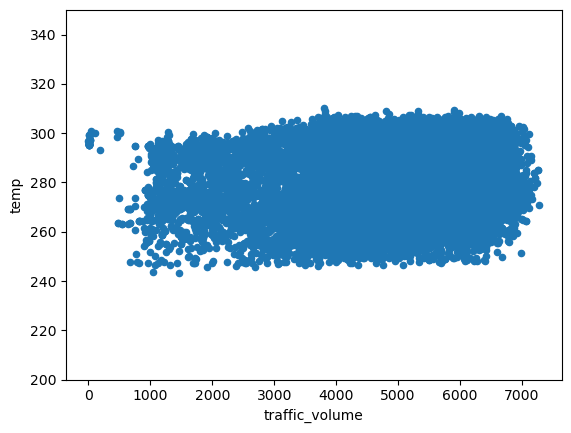

In [44]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 350) # two wrong 0K temperatures mess up the y-axis
plt.show()

This graphic does not look good to do any inference.

### Categorical Weather Data

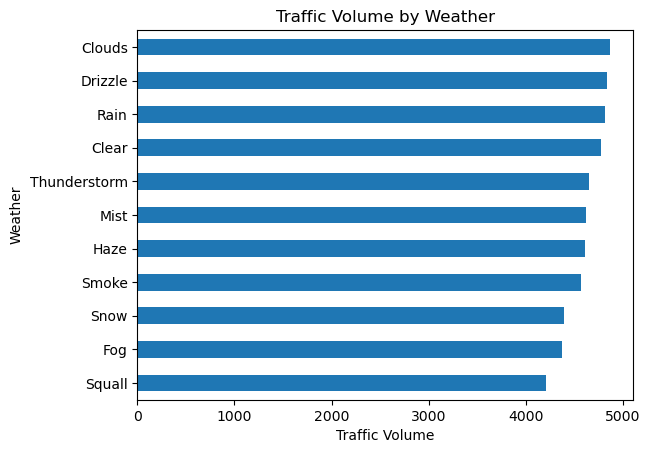

In [47]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean().sort_values()
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean().sort_values()

by_weather_main.plot.barh(title='Traffic Volume by Weather', xlabel='Traffic Volume', ylabel='Weather')
plt.show()

By `weather_main` we don't see any variable that shows a much higher traffic volume. 

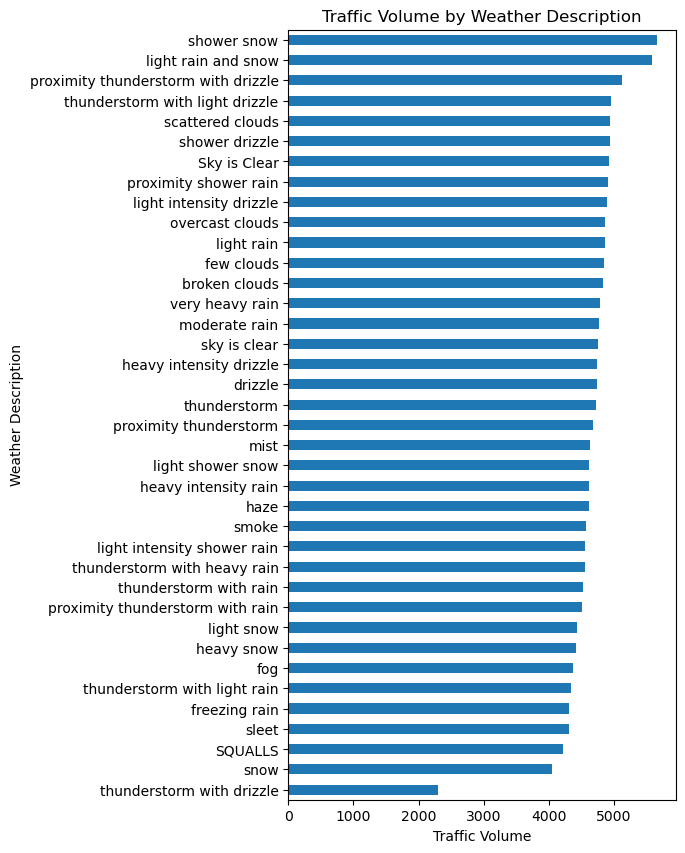

In [49]:
by_weather_description.plot.barh(title = 'Traffic Volume by Weather Description', xlabel = 'Traffic Volume', ylabel = 'Weather Description',figsize = (5,10))
plt.show()

Now we see two `weather_description` categories that average over 5000 cars per hour:
* **shower snow**
* **light rain and snow**

As snow combined with rain causes icy road conditions, we can see from the data that it leads to heavier traffic likely due to cars slowing down, or due to an increase in road accidents.

## Conclusions

**Time Indicators:**

* Warmer months (March - October)
* Business days (Monday - Friday)
* Rush hour periods (7-9am and 4-6pm)

**Weather Indicators:**

* Shower snow
* Light rain and snow